In [1]:
%matplotlib inline


# Davis Club


Davis Southern Club Women

Shows how to make unipartite projections of the graph and compute the
properties of those graphs.

These data were collected by Davis et al. in the 1930s.
They represent observed attendance at 14 social events by 18 Southern women.
The graph is bipartite (clubs, women).


In [2]:
import matplotlib.pyplot as plt
import networkx as nx
import networkx.algorithms.bipartite as bipartite
import itertools
from operator import itemgetter

In [3]:
G = nx.davis_southern_women_graph()
women = G.graph['top']
clubs = G.graph['bottom']


In [4]:
women[0]

'Evelyn Jefferson'

In [5]:
import pandas as pd
df = pd.DataFrame(index = G.edges())

In [6]:
#df.head()

In [7]:
import numpy as np
biadjency_mat = np.array(bipartite.biadjacency_matrix(G, women, clubs))


In [8]:
#print("Biadjacency matrix")
#print(bipartite.biadjacency_matrix(G, women, clubs))


In [9]:
# project bipartite graph onto women nodes
W = bipartite.projected_graph(G, women)
print('')
print("#Friends, Member")
for w in women:
    print('%d %s' % (W.degree(w), w))


#Friends, Member
17 Evelyn Jefferson
15 Laura Mandeville
17 Theresa Anderson
15 Brenda Rogers
11 Charlotte McDowd
15 Frances Anderson
15 Eleanor Nye
16 Pearl Oglethorpe
17 Ruth DeSand
17 Verne Sanderson
16 Myra Liddel
16 Katherina Rogers
17 Sylvia Avondale
17 Nora Fayette
17 Helen Lloyd
16 Dorothy Murchison
12 Olivia Carleton
12 Flora Price


In [10]:
# project bipartite graph onto women nodes keeping number of co-occurence
# the degree computed is weighted and counts the total number of shared contacts
W = bipartite.weighted_projected_graph(G, women)
print('')
print("#Friend meetings, Member")
for w in women:
    print('%d %s' % (W.degree(w, weight='weight'), w))



#Friend meetings, Member
50 Evelyn Jefferson
45 Laura Mandeville
57 Theresa Anderson
46 Brenda Rogers
24 Charlotte McDowd
32 Frances Anderson
36 Eleanor Nye
31 Pearl Oglethorpe
40 Ruth DeSand
38 Verne Sanderson
33 Myra Liddel
37 Katherina Rogers
46 Sylvia Avondale
43 Nora Fayette
34 Helen Lloyd
24 Dorothy Murchison
14 Olivia Carleton
14 Flora Price


C:\ProgramData\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


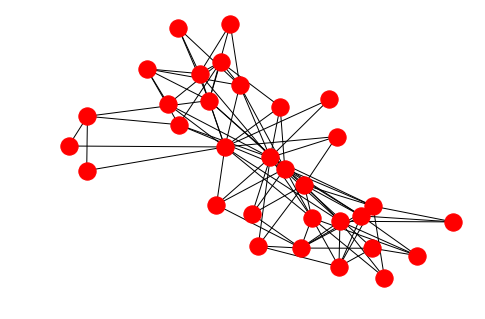

In [11]:
nx.draw(G)
plt.show()

## Women Graph by projection

In [12]:
# project bipartite graph onto women nodes
g = nx.bipartite.weighted_projected_graph(G, women)

### Number of Nodes

In [13]:
len(g.nodes())

18

### Number of Edges

In [14]:
len(g.edges())

139

### Distribution of Degrees Centralityof  the Network G.

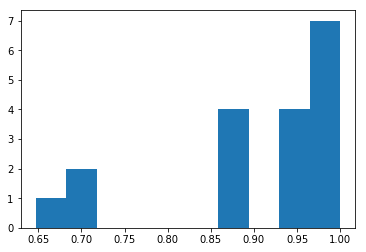

In [15]:
plt.hist(list(nx.degree_centrality(g).values()))
plt.show()


#### The distribution is left skewed

### Nodes with high degree centrality

In [16]:
def nodes_with_highest_deg_cent(h):
    deg_cent = nx.degree_centrality(h)
    max_dc = max(list(deg_cent.values()))
    nodes = set()
    for k,v in deg_cent.items():
        if v == max_dc:
            nodes.add(k)
    return nodes

In [17]:
top_dc = nodes_with_highest_deg_cent(g)

In [18]:
print(top_dc)

{'Theresa Anderson', 'Ruth DeSand', 'Evelyn Jefferson', 'Sylvia Avondale', 'Helen Lloyd', 'Verne Sanderson', 'Nora Fayette'}


### Distribution of betweenness centrality

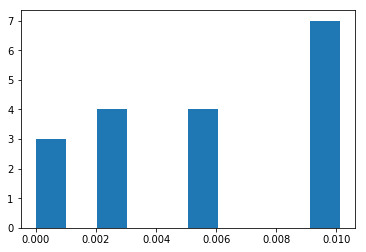

In [19]:
plt.hist(list(nx.betweenness_centrality(g).values()))
plt.show()


#### The ditribution is also left skewed

(-0.6165712055523686,
 0.6573465106314147,
 -1.0803167857097604,
 1.1311824933755994)

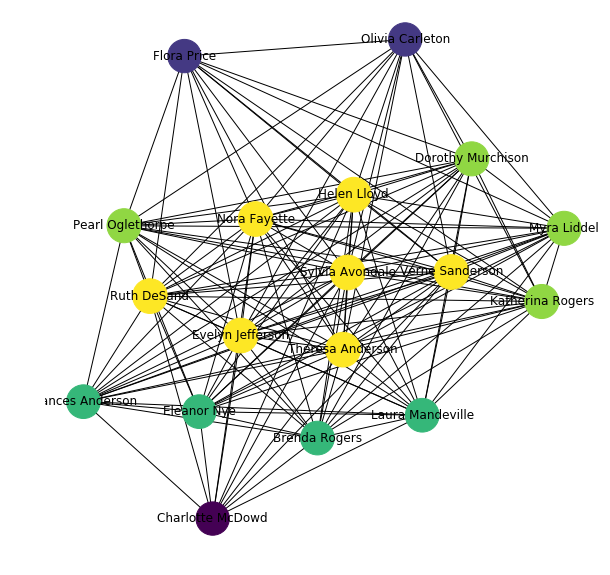

In [20]:
pos = nx.spring_layout(g)
betCent = nx.betweenness_centrality(g, normalized=True, endpoints=True)
node_color = [20000.0 * g.degree(v) for v in g]
node_size =  [v * 10000 for v in betCent.values()]
plt.figure(figsize=(10,10))
nx.draw_networkx(g, pos=pos, with_labels=True,
                 node_color=node_color,
                 node_size=node_size)
plt.axis('off')

In [21]:
def nodes_with_highest_bet_cent(h):
    deg_cent = nx.betweenness_centrality(h)
    max_dc = max(list(deg_cent.values()))
    nodes = set()
    for k,v in deg_cent.items():
        if v == max_dc:
            nodes.add(k)
    return nodes

In [22]:
top_bet = nodes_with_highest_bet_cent(g)

In [23]:
print(top_bet)

{'Theresa Anderson', 'Ruth DeSand', 'Evelyn Jefferson', 'Sylvia Avondale', 'Helen Lloyd', 'Verne Sanderson', 'Nora Fayette'}


### Eigenvector Centrality

In [24]:

eigen_cent = nx.eigenvector_centrality(g)

In [25]:
# Assign each to an attribute in your network
nx.set_node_attributes(g, eigen_cent, 'eigenvector')

In [26]:
sorted_eigenvector = sorted(eigen_cent.items(), key=itemgetter(1), reverse=True)


In [47]:
print("Top 7 nodes by Eigenvector centrality:")
for e in sorted_eigenvector[:7]:
    print(e,  nx.get_node_attributes(g, 'eigenvector')[e[0]])

Top 7 nodes by Eigenvector centrality:
('Evelyn Jefferson', 0.2535242050574115) 0.2535242050574115
('Theresa Anderson', 0.2535242050574115) 0.2535242050574115
('Ruth DeSand', 0.25352420505741147) 0.25352420505741147
('Verne Sanderson', 0.25352420505741147) 0.25352420505741147
('Sylvia Avondale', 0.25352420505741147) 0.25352420505741147
('Nora Fayette', 0.25352420505741147) 0.25352420505741147
('Helen Lloyd', 0.25352420505741147) 0.25352420505741147


### Connected component subgraph

In [28]:
for h in list(g.subgraph(c) for c in nx.connected_components(g)):
    print(len(h.nodes()))

18


In [29]:
[len(c) for c in list(g.subgraph(b) for b in nx.connected_components(g)) if len(c) > 1]

[18]

## Island Method

#### define water level to trim the island

In [30]:
def trim_edges(g, weight=1):
    g2=nx.Graph()
    for f, to, edata in g.edges(data=True):
        if edata['weight'] > weight:
            g2.add_edge(f, to, weight = edata)
    return g2

#### Raising the water level to trim the island

In [31]:
def island_method(g, iterations=5):
    weights= [edata['weight'] for f,to,edata in g.edges(data=True)]
    mn=int(min(weights))
    mx=int(max(weights))
    #compute the size of the step, so we get a reasonable step in iterations
    step=int((mx-mn)/iterations)
    return [[threshold, trim_edges(g, threshold)] for threshold in range(mn,mx,step)]

#### Connected components that remain

In [32]:
cc=list(nx.connected_component_subgraphs(g))[0]
islands=island_method(cc)
for i in islands:
    # print the threshold level, size of the graph, and number of connected components
    print(i[0], len(list(i[1])), len(list(nx.connected_component_subgraphs(i[1])))) 

1 18 1
2 15 1
3 14 2
4 7 2
5 7 2
6 2 1


In [33]:
#g.edges(data=True)

### Extracting and Visualizing Ego Networks with Python

In [34]:
list(nx.ego_graph(g, 'Evelyn Jefferson'))

['Evelyn Jefferson',
 'Laura Mandeville',
 'Theresa Anderson',
 'Brenda Rogers',
 'Charlotte McDowd',
 'Frances Anderson',
 'Eleanor Nye',
 'Pearl Oglethorpe',
 'Ruth DeSand',
 'Verne Sanderson',
 'Myra Liddel',
 'Katherina Rogers',
 'Sylvia Avondale',
 'Nora Fayette',
 'Helen Lloyd',
 'Dorothy Murchison',
 'Olivia Carleton',
 'Flora Price']

In [35]:
len(list(nx.ego_graph(g, 'Evelyn Jefferson')))

18

In [36]:
list(nx.ego_graph(g, 'Sylvia Avondale'))

['Evelyn Jefferson',
 'Laura Mandeville',
 'Theresa Anderson',
 'Brenda Rogers',
 'Charlotte McDowd',
 'Frances Anderson',
 'Eleanor Nye',
 'Pearl Oglethorpe',
 'Ruth DeSand',
 'Verne Sanderson',
 'Myra Liddel',
 'Katherina Rogers',
 'Sylvia Avondale',
 'Nora Fayette',
 'Helen Lloyd',
 'Dorothy Murchison',
 'Olivia Carleton',
 'Flora Price']

#### Cliques are groups of nodes that are fully connected to one another
####  Find women that are part of the largest maximal clique

In [37]:
largest_clique = sorted(nx.find_cliques(g), key=lambda x:len(x))[-1]

In [38]:
glc = g.subgraph(largest_clique)

(-0.990661550998523,
 1.1370324134534378,
 -1.1505620219105774,
 1.133572101457526)

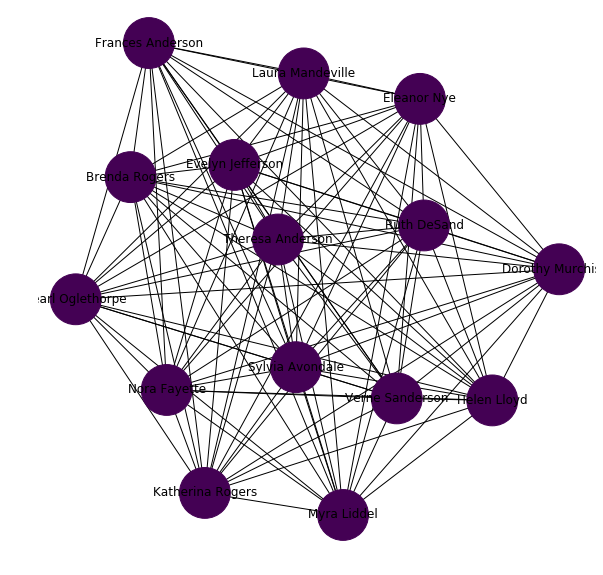

In [39]:
pos = nx.spring_layout(glc)
eigCent = nx.eigenvector_centrality(glc)
node_color = [20000.0 * glc.degree(v) for v in glc]
node_size =  [v * 10000 for v in eigCent.values()]
plt.figure(figsize=(10,10))
nx.draw_networkx(glc, pos=pos, with_labels=True,
                 node_color=node_color,
                 node_size=node_size)
plt.axis('off')

### There are 15 women that are totally connected to each other.

## Clubs Graph by projection

In [41]:
# project bipartite graph onto clubs nodes
h = nx.bipartite.weighted_projected_graph(G, clubs)

#### Clubs distribution of degree centrality

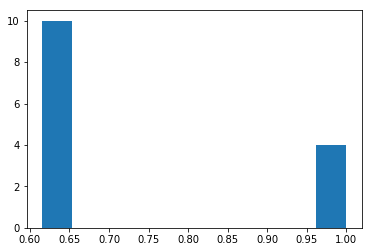

In [42]:
plt.hist(list(nx.degree_centrality(h).values()))
plt.show()

There are 4 nodes with high degree centrality and 10 nodes with lower degree centrality.

In [43]:
top_dcc = nodes_with_highest_deg_cent(h)

In [44]:
print(top_dcc)

{'E6', 'E7', 'E8', 'E9'}


These are the 4 nodes with high degree centrality.

#### Connection between clubs

(-0.9467281785161239,
 0.7973164130496675,
 -1.089868410325841,
 1.1359379610500786)

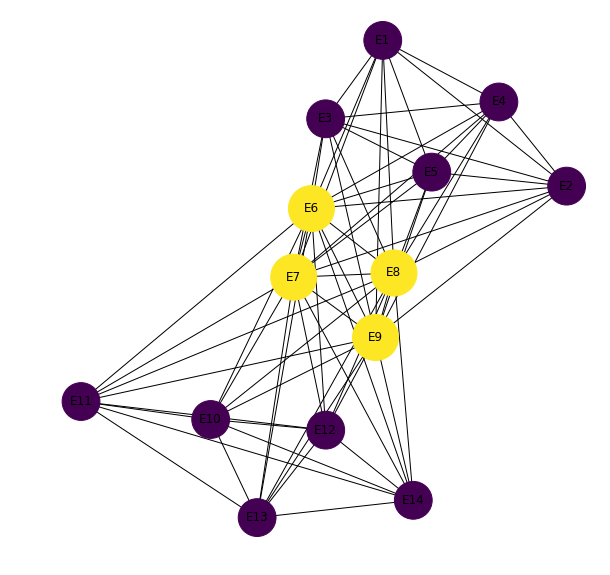

In [46]:
pos = nx.spring_layout(h)
betCentc = nx.betweenness_centrality(h, normalized=True, endpoints=True)
node_color = [20000.0 * h.degree(v) for v in h]
node_size =  [v * 10000 for v in betCentc.values()]
plt.figure(figsize=(10,10))
nx.draw_networkx(h, pos=pos, with_labels=True,
                 node_color=node_color,
                 node_size=node_size)
plt.axis('off')

There are 4 predominants clubs E6, E7, E8, and E9 

In [48]:
ls


 Volume in drive C is OS
 Volume Serial Number is F47B-E49D

 Directory of C:\Users\ALAIN

03/13/2020  12:29 PM    <DIR>          .
03/13/2020  12:29 PM    <DIR>          ..
07/05/2019  12:37 PM    <DIR>          .anaconda
06/26/2016  07:59 PM    <DIR>          .android
12/26/2019  09:30 PM               398 .bash_history
07/05/2019  01:00 PM    <DIR>          .conda
02/15/2020  05:16 PM                60 .condarc
02/15/2020  04:45 PM    <DIR>          .config
04/07/2016  10:54 PM    <DIR>          .dnx
10/04/2018  08:28 AM    <DIR>          .eclipse
02/14/2017  07:12 PM    <DIR>          .frostwire5
12/11/2019  10:33 AM               238 .gitconfig
06/13/2018  07:52 PM    <DIR>          .IdeaIC2018.1
09/04/2019  04:32 PM    <DIR>          .idlerc
03/13/2020  12:09 PM    <DIR>          .ipynb_checkpoints
07/05/2019  12:45 PM    <DIR>          .ipython
06/04/2018  05:13 PM    <DIR>          .jmc
10/02/2019  06:20 PM    <DIR>          .jupyter
09/17/2019  06:35 AM    <DIR>          .matp